# 1 꼭 필요한 자료구조 기초

- 탐색  
많은 양의 데이터 중에서 원하는 데이터를 찾는 과정  
대표적인 알고리즘: DFS/BFS  

- 자료구조  
데이터를 표현하고 관리하고 처리하기 위한 구조  
기초 개념: 스택과 큐

- 스택,큐  
삽입,삭제,오버플로,언더플로를 고민  

## 스택

박스 쌓기에 비유  
아래에 있는 박스를 치우기 위해 위에 있는 박스를 내려야 함==>선입후출, 후입선출

삽입(5)->삽입(2)->삽입(3)->삽입(7)->삭제()->삽입(1)->삽입(4)->삭제()

In [1]:
stack=[]
stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
stack.pop()
stack.append(1)
stack.append(4)
stack.pop()
print(stack)

[5, 2, 3, 1]


In [2]:
print(stack[::-1])

[1, 3, 2, 5]


## 큐

새치기가 없다는 가정하에 대기 줄에 비유  
나중에 온 사암일수록 나중에 들어감==> 선입선출

삽입(5)->삽입(2)->삽입(3)->삽입(7)->삭제()->삽입(1)->삽입(4)->삭제()

In [5]:
from collections import deque
queue=deque()
queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft()
queue.append(1)
queue.append(4)
queue.popleft()
print(queue)

deque([3, 7, 1, 4])


In [6]:
queue.reverse()
print(queue)

deque([4, 1, 7, 3])


## 재귀함수

자기 자신을 다시 호출하는 함수  
재귀함수=프랙탈

**종료 조건이 중요**

팩토리얼 문제가 대표적인 예제

In [8]:
# 반복적  
def fac_iterative(n):
    result=1
    for i in range(1,n+1):
        result*=i
    return result   

In [7]:
# 재귀함수  
def fac_recursive(n):
    if n<=1:
        return 1
    return n*fac_recursive(n-1)

In [9]:
fac_iterative(5)

120

In [10]:
fac_recursive(5)

120

# 2 탐색 알고리즘 DFS/BFS

## DFS

Depth-First Search, 깊이 우선 탐색  
그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘

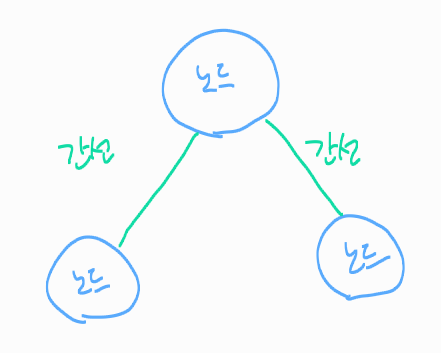

그래프의 탐색이란 하나의 노드를 시작으로 다수의 노드를 방문하는 것을 말함  
두 노드가 간선으로 연결되어 있으면 두 노드는 인접하다고 얘기함

- Adjacency Matrix (인접 행렬): 2차원 배열로 그래프의 연결 관계를 표현  

In [1]:
INF=99999999
graph=[[0,7,5],
      [7,0,INF],
      [5,INF,0]]
print(graph)

[[0, 7, 5], [7, 0, 99999999], [5, 99999999, 0]]


- Adjacency List (인접 리스트): 리스트로 그래프의 연결 관계를 표현 

In [2]:
graph=[[]for _ in range(3)]
graph[0].append((1,7))
graph[0].append((2,5))
graph[1].append((0,7))
graph[2].append((0,5))
print(graph)

[[(1, 7), (2, 5)], [(0, 7)], [(0, 5)]]


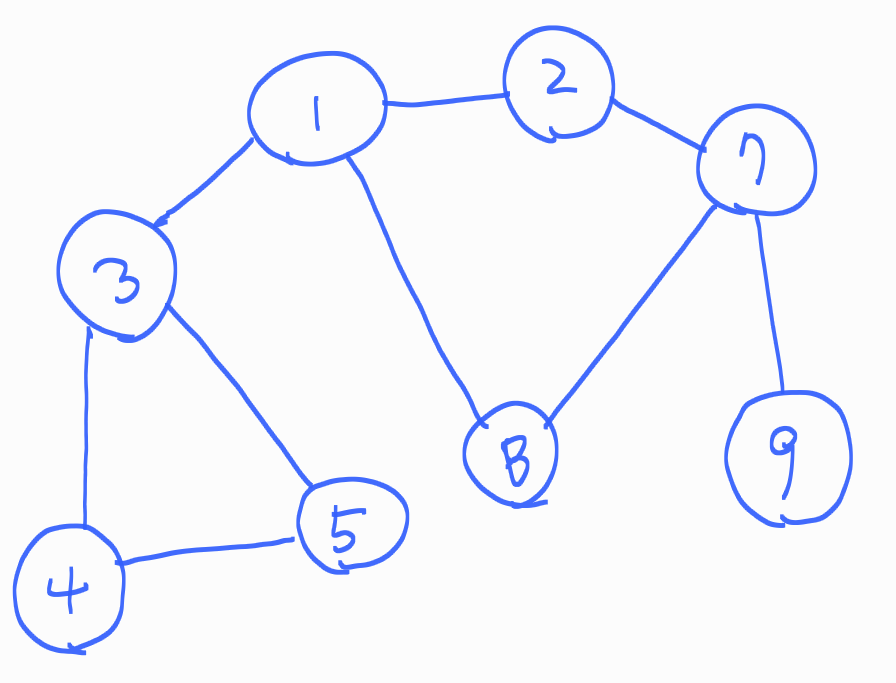

- 시작 노드인 1을 스택에 삽입하고 방문 처리

- 스택의 최상단 노드인 1 에 방문하지 않고 인접한 노드는 2,3,8이 있고 가장 작은 2를 삽입하고 방문 처리

- 2에 인접한 7을 방문 처리

- 7에 인접한 6,8을 방문 처리하고 6,8은 인접한 노드가 없으므로 꺼냄

- 7,2도 인점한 노드가 없으므로 다시 꺼냄

- 3을 삽입하고 방문 처리

- 4,5를 삽입하고 방문 처리

- 차례대로 꺼냄

노드의 탐색 순서: 1->2->7->6->8->3->4->5

In [6]:
def dfs(graph,v,visited):
    visited[v]=True
    print(v,end=' ')
    for i in graph[v]:
        if not visited[i]:
            dfs(graph,i,visited)


In [7]:
graph=[[],[2,3,8],[1,7],[1,4,5],[3,5],[3,4],[7],[2,6,8],[1,7]]
visited=[False]*9
dfs(graph,1,visited)

1 2 7 6 8 3 4 5 

## BFS

Breadth-First Search, 너비 우선 탐색  
그래프에서 가까운 노드를 우선적으로 탐색하는 알고리즘

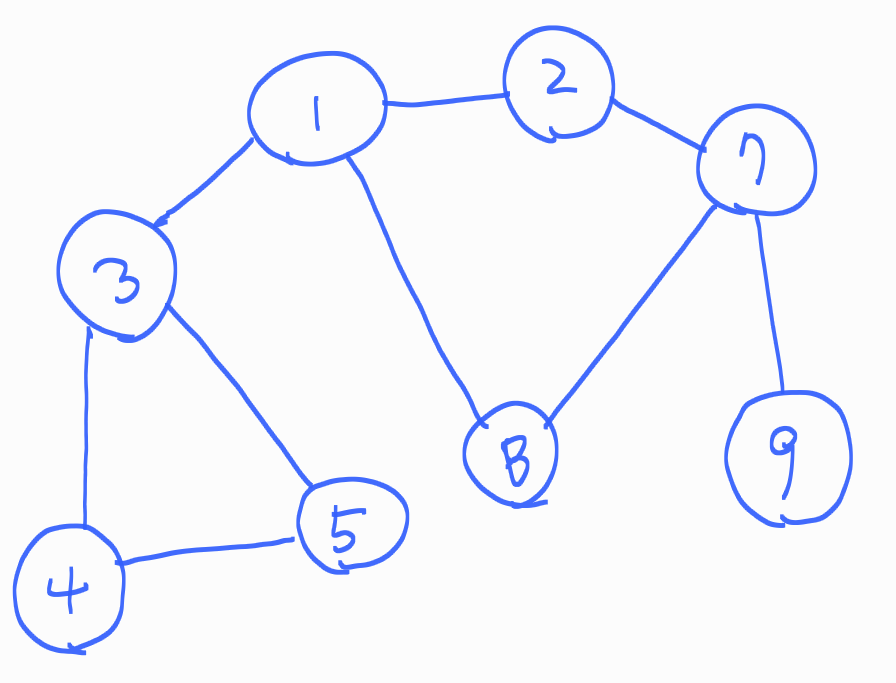

- 시작 노드인 1을 큐에 삽입하고 방문 처리

- 1을 꺼내고 인접한 2,3,8을 모두 큐에 삽입하고 방문 처리

- 2를 꺼내고 인접한 7을 방문 처리

- 3을 꺼내고 인접한 4,5를 방문 처리

- 8을 꺼냄

- 3을 삽입하고 방문 처리

- 7을 꺼내고 인접한 6을 방문 처리

- 차례대로 꺼냄

노드의 탐색 순서: 1->2->3->8->7->4->5->6

In [10]:
from collections import deque
def bfs(graph,start,visited):
    queue=deque([start])
    visited[start]=True
    while queue:
        v=queue.popleft()
        print(v,end=' ')
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i]=True

In [11]:
graph=[[],[2,3,8],[1,7],[1,4,5],[3,5],[3,4],[7],[2,6,8],[1,7]]
visited=[False]*9
bfs(graph,1,visited)

1 2 3 8 7 4 5 6 

# 3. 음료수 얼려 먹기

$N \times M$크기의 얼음 틀이 있는데, 구멍이 뚫려 있는 부분은 0, 칸막이가 존재하면 1로 표시  
구멍이 뚫려 있는 부분끼리 상,하,좌,우로 붙어 있는 경우 서로 연결 된 걸로 간주  
이때 얼음 틀에 생성되는 아이스크림의 총 개수를 구하는 프로그램 작성

- 입력 조건  
첫 번째 줄에 얼음 틀의 세로 길이 N과 가로 길이 M이 주어짐 (1이상 1000이하)  
N+1번째 줄까지 얼음 틀의 형태가 주어짐  
구멍이 뚫려 있는 부분은 0, 칸막이가 존재하면 1로 표시 

- 출력 조건  
한 번에 만들 수 있는 아이스크림의 총 개수

In [3]:
n, m = map(int, input().split())

3 3


In [5]:
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

001
010
101


In [9]:
def dfs(x, y):
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    if graph[x][y] == 0:
        graph[x][y] = 1
        dfs(x - 1, y)
        dfs(x, y - 1)
        dfs(x + 1, y)
        dfs(x, y + 1)
        return True
    return False

In [10]:
result = 0
for i in range(n):
    for j in range(m):
        if dfs(i, j) == True:
            result += 1

print(result)

3


In [12]:
n, m = map(int, input().split())

4 5


In [13]:
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

00110
00011
11111
00000


In [15]:
result = 0
for i in range(n):
    for j in range(m):
        if dfs(i, j) == True:
            result += 1

print(result)

3


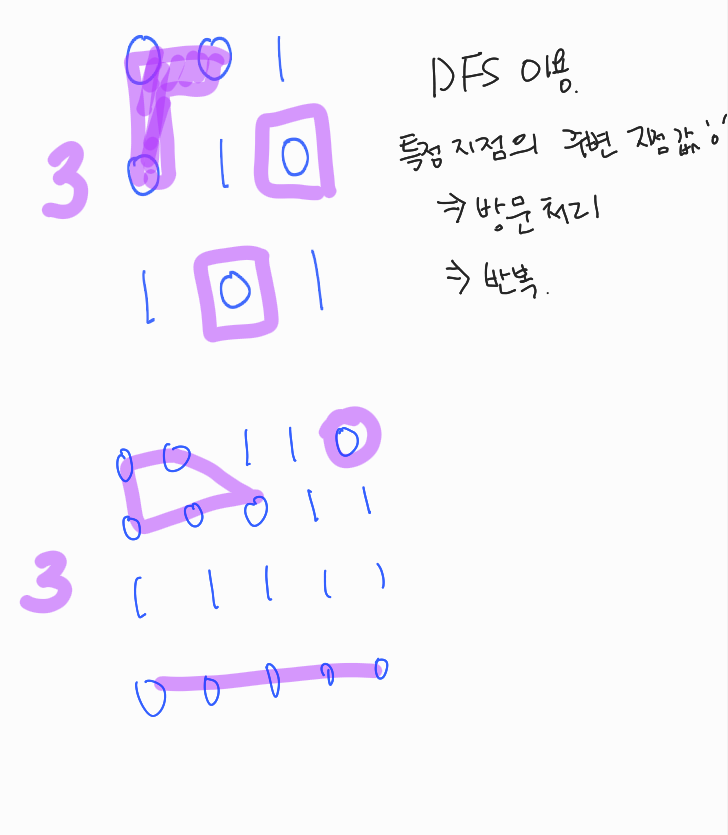

# 4. 미로 탈출

$N \times M$크기의 미로에 갇힘  
미로에 있는 괴물들을 피해 탈출  
위치는 (1,1)이고 출구는 (N,M)  
한 번에 한 칸씩 이동 가능  
괴물이 있는 부분은 0, 괴물이 없으면 1로 표시  
탈출하기 위해 움직여야 하는 최대 칸의 개수를 구하시오  
칸을 셀 때는 시작 칸과 마지막 칸을 모두 포함

- 입력 조건  
첫 번째 줄에 N과 M이 주어짐 (4이상 200 이하)  
N개의 줄에는 각각 M개의 정수로 미로 정보가 주어짐  
시작과 마지막은 무조건 1

- 출력 조건  
이동한 칸의 개수

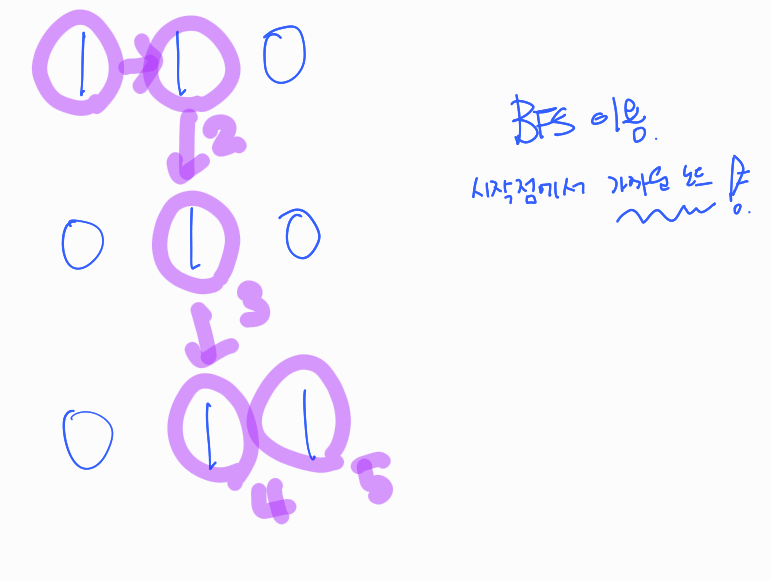

In [25]:
n, m = map(int, input().split())

3 3


In [26]:
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

110
010
011


In [27]:
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

In [28]:
from collections import deque
def bfs(x, y):
    queue = deque()
    queue.append((x, y))
    while queue:
        x, y = queue.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if nx < 0 or nx >= n or ny < 0 or ny >= m:
                continue
            if graph[nx][ny] == 0:
                continue
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
    return graph[n - 1][m - 1]

In [29]:
print(bfs(0, 0))

5
